# Пример программы, использующей алгоритм машинного обучения

In [1]:
import pandas

In [2]:
from google.colab import files

In [3]:
# Загрузка исходного файла с данными
files.upload()                           

Saving trips_data.xlsx to trips_data.xlsx


{'trips_data.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [4]:
# Просмотр загруженных файлов
!ls

sample_data  trips_data.xlsx


In [5]:
# Чтение excel файла и сохранение данных в переменную
trips = pandas.read_excel("trips_data.xlsx")

In [6]:
# Просмотр первых 5 строк в таблице
trips.head()

,Unnamed: 0,salary,city,age,vacation_preference,transport_preference,family_members,target
0,0,196000,Краснодар,25,Шоппинг,Автомобиль,1,New York
1,1,152000,Екатеринбург,60,Архитектура,Самолет,1,London
2,2,83000,Томск,49,Архитектура,Автомобиль,2,Sydney
3,3,161000,Краснодар,41,Шоппинг,Автомобиль,0,New York
4,4,146000,Краснодар,58,Архитектура,Самолет,1,Sydney


In [7]:
# Информация о числовых данных в таблице
trips.describe()

,Unnamed: 0,salary,age,family_members
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,111935.000000,55.209000,1.295000
std,288.819436,54580.049073,11.925164,0.885867
min,0.000000,0.000000,18.000000,0.000000
25%,249.750000,68000.000000,50.000000,1.000000
50%,499.500000,99000.000000,58.000000,1.000000
75%,749.250000,161000.000000,63.000000,2.000000
max,999.000000,250000.000000,82.000000,4.000000


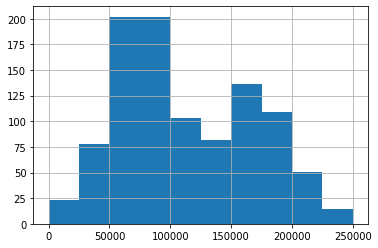

In [8]:
# Построение гистограммы по значениям столбца salary
trips.salary.hist()

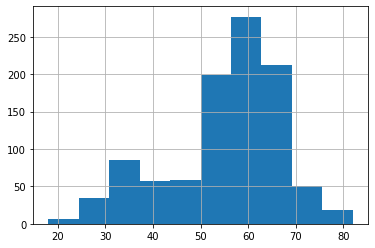

In [9]:
# Построение гистограммы по значениям столбца age
trips.age.hist()

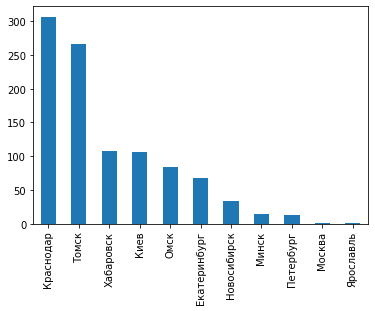

In [10]:
# Построение столбчатой диаграммы по городам отправления
trips.city.value_counts().plot(kind="bar")

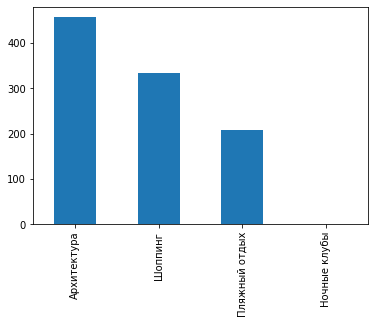

In [11]:
# Построение столбчатой диаграммы по предпочтениям в поездке
trips.vacation_preference.value_counts().plot(kind="bar")

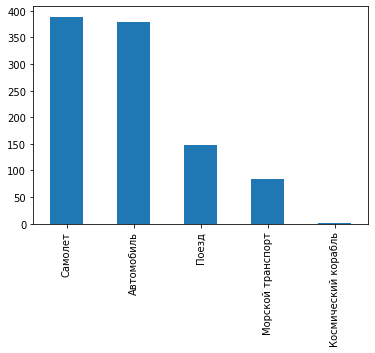

In [12]:
# Построение столбчатой диаграммы по транспорту
trips.transport_preference.value_counts().plot(kind="bar")

In [13]:
# Преобразование данных таблицы (включая текст) в числовой формат 
# для их понимания алгоритмом
trips_processed = pandas.get_dummies(trips, columns=['city', 
                                                     'vacation_preference', 
                                                     'transport_preference'])  

In [14]:
# Импортирование нужного классификатора
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
# Настройка классификатора
classifier = GradientBoostingClassifier(learning_rate=0.08, n_estimators=200)

In [96]:
# Входные данные, на основе которых мы делаем предсказание (обучающая выборка)
# Эти данные не включают в себя выбранное место поездки target
input_data = trips_processed.drop('target', axis=1) 

In [97]:
# Выходные данные, которые будут предсказаны
output_data = trips_processed.target  

In [98]:
# Обучение модели предказывать данные
classifier.fit(input_data, output_data) 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.08, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
# Парсинг всех столбцов таблицы (кроме target), который нужно заполнить и
# отправить модели в качестве входных данных
{col:0 for col in trips_processed.columns}

{'Unnamed: 0': 0,
 'age': 0,
 'city_Екатеринбург': 0,
 'city_Киев': 0,
 'city_Краснодар': 0,
 'city_Минск': 0,
 'city_Москва': 0,
 'city_Новосибирск': 0,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'family_members': 0,
 'salary': 0,
 'target': 0,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 0,
 'transport_preference_Поезд': 0,
 'transport_preference_Самолет': 0,
 'vacation_preference_Архитектура': 0,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 0,
 'vacation_preference_Шоппинг': 0}

In [104]:
# Создание и редактирование данных
example = {
 'Unnamed: 0': 0,
 'age': 22,
 'city_Екатеринбург': 0,
 'city_Киев': 0,
 'city_Краснодар': 1,
 'city_Минск': 0,
 'city_Москва': 0,
 'city_Новосибирск': 0,
 'city_Омск': 0,
 'city_Петербург': 0,
 'city_Томск': 0,
 'city_Хабаровск': 0,
 'city_Ярославль': 0,
 'family_members': 1,
 'salary': 80000,
 'transport_preference_Автомобиль': 0,
 'transport_preference_Космический корабль': 0,
 'transport_preference_Морской транспорт': 0,
 'transport_preference_Поезд': 1,
 'transport_preference_Самолет': 0,
 'vacation_preference_Архитектура': 0,
 'vacation_preference_Ночные клубы': 0,
 'vacation_preference_Пляжный отдых': 1,
 'vacation_preference_Шоппинг': 0
 }

In [105]:
# Тестовые данные из примера выше преобразуются в нужный формат
row = pandas.DataFrame(data=[example])  

In [106]:
# Предсказывание места отправления target на основе тестовых данных
pred = classifier.predict(row) 

In [107]:
# Результат предсказания
print(f'Ркомендуемое место отправления - {pred[0]}')

Ркомендуемое место отправления - Paris
